In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from itertools import islice
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv('BATADAL_dataset_training_1.csv').select_dtypes(include=['float64'])
plot_df = df[0:800]

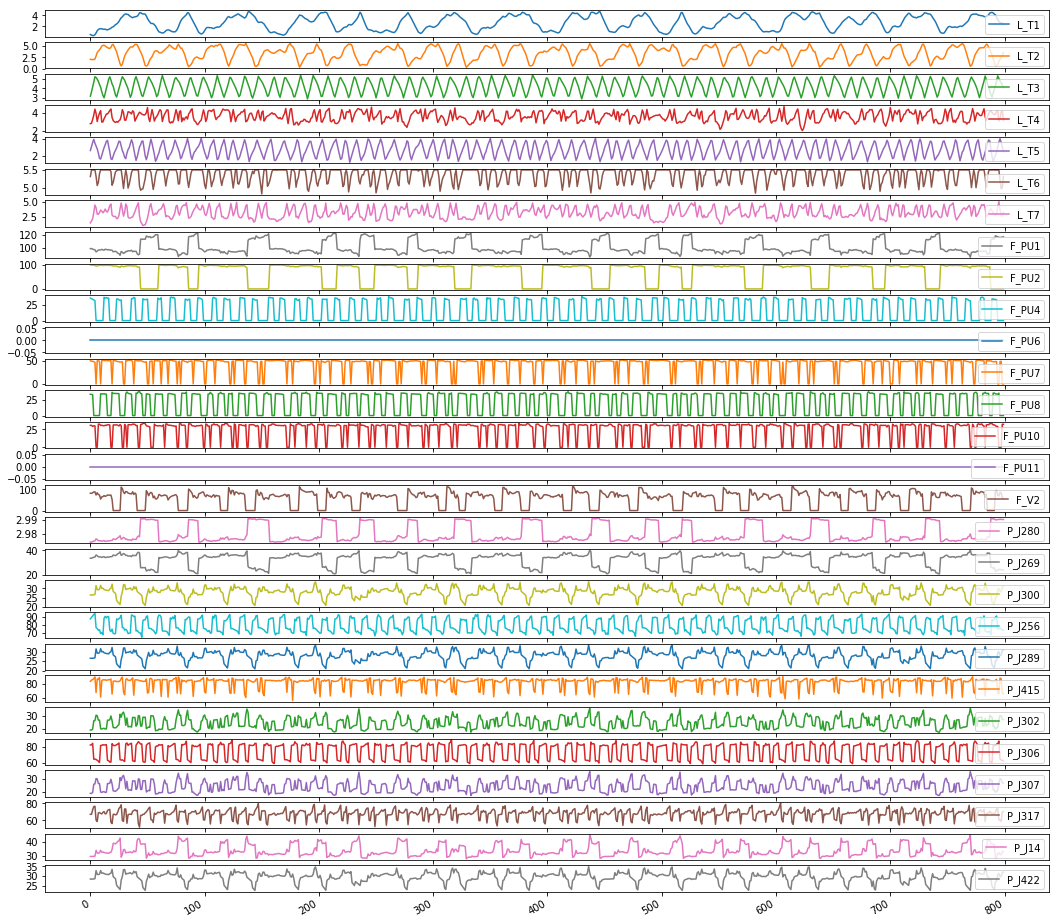

In [5]:
plot_df.plot(kind='line', subplots=True, sharex=True, figsize=(18, 18), legend=True)
[ax.legend(loc=1) for ax in plt.gcf().axes]
plt.show()

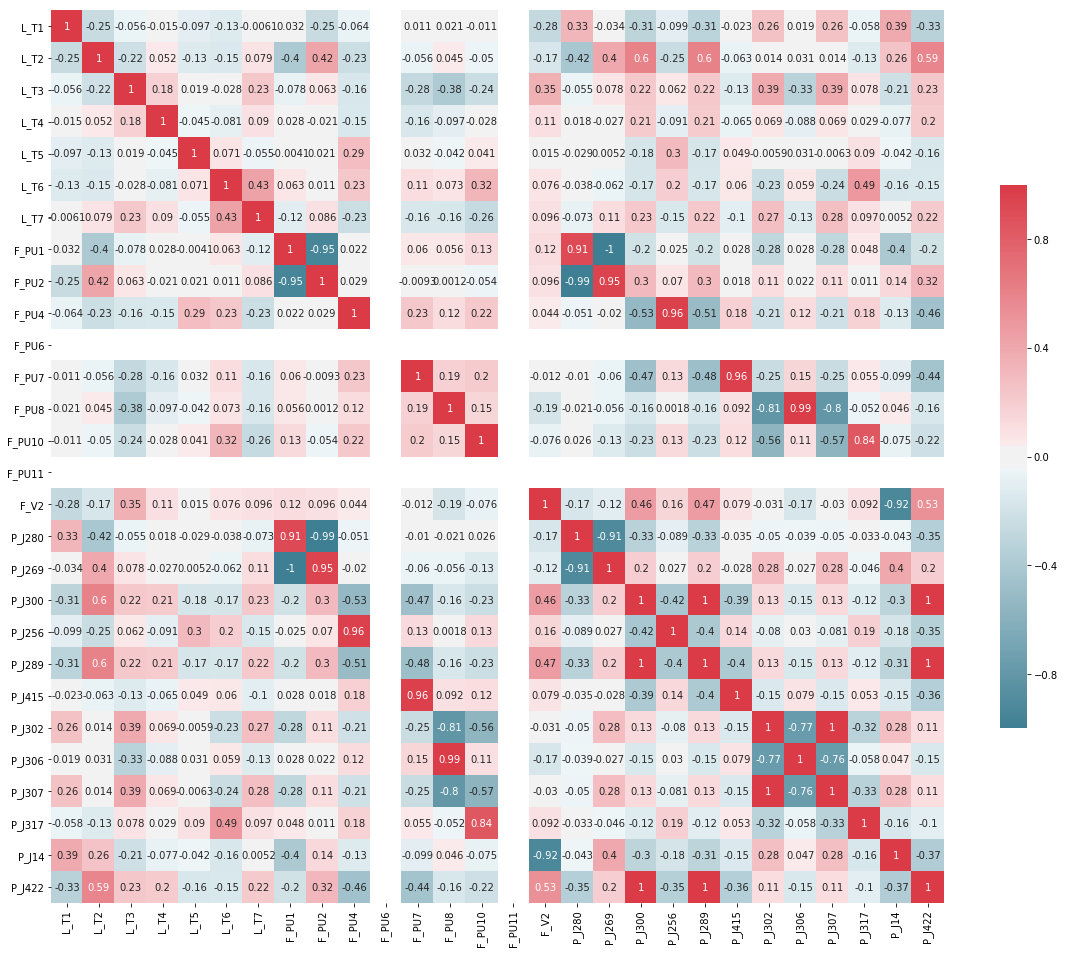

In [8]:
# Plot correlation matrix
corr = plot_df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr, square=True, vmin=-1, vmax=1, annot=True, mask=corr.isnull(), cmap=cmap, cbar_kws={"shrink": .5})
plt.show()

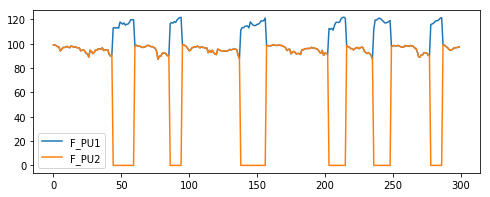

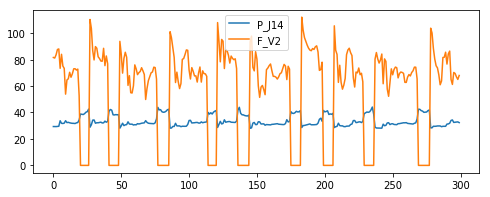

In [17]:
# Plot two signals
def plot_signals(signal1, signal2):
    plt.figure(figsize=(8,3))
    plt.plot(plot_df[signal1][0:300], label=signal1)
    plt.plot(plot_df[signal2][0:300], label=signal2)
    plt.legend()
    plt.show()

plot_signals('F_PU1', 'F_PU2')
plot_signals('P_J14', 'F_V2')

In [20]:
def sliding_window(seq, n):
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [37]:
def predict(window):
    i = 0
    error = np.zeros(df.shape[1])
    
    # Iterate over columns to make a prediction
    for column in df:
        temp = sliding_window(df[column], window)
        X = np.zeros(shape=(df[column].shape[0] - window + 1, window))
        y = df[column][window:]

        for index, item in enumerate(temp):
            X[index] = np.asarray(item)
        X = X[0:-1] # Drop last row as there is no value later to predict

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        error[i] = mean_squared_error(y_test, y_pred) 
        print("%s has a MSE error of %.6f" % (column, error[i]))
        
        i += 1
    
    return error

In [36]:
# Apply normalization
for column in df:
    df[column] /= df[column].max()

# Find optimal value for window size
best_error = float('Inf')
best_window = 0
for i in range(20, 50):
    temp = sum(predict(i))
    print("window size: %d, total error: %f" % (i, temp))
    
    if(temp < best_error):
        best_error = temp
        best_window = i

print("BEST window: %d, BEST error: %f" % (best_window, best_error))

window size: 20, total error: 158465786948265792.000000
window size: 21, total error: 1639768589321202.500000
window size: 22, total error: 0.458471
window size: 23, total error: 0.454480
window size: 24, total error: 0.460937
window size: 25, total error: 0.443047
window size: 26, total error: 0.434908
window size: 27, total error: 0.437112
window size: 28, total error: 0.423439
window size: 29, total error: 0.447546
window size: 30, total error: 0.435792
window size: 31, total error: 0.443057
window size: 32, total error: 0.427638
window size: 33, total error: 0.420430
window size: 34, total error: 0.425038
window size: 35, total error: 0.439973
window size: 36, total error: 0.439647
window size: 37, total error: 0.416086
window size: 38, total error: 0.434729
window size: 39, total error: 0.431856
window size: 40, total error: 0.428695
window size: 41, total error: 0.423451
window size: 42, total error: 0.423237
window size: 43, total error: 0.431768
window size: 44, total error: 0.